# Microsoft  Movie Project  1

## Introduction
This is a high profile project tasked i use basic Data Science equipment to analyse on any findings. 


# Business Problem 
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Files of The Data
* Box Office Mojo: https://www.boxofficemojo.com/
* IMDBLinks to an external site :https://www.imdb.com/
## Tools 
* Jupyter 
* Pandas
* Csv Files 
* Git

# Objectives 
1. Highest produced genres 
2. Highest profit making genre
3. Highest Rated genres 
4. Day and month to realease movie 
5. Language

#  load libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading files 

In [15]:
#concat this by tconst
Title_rating = pd.read_csv('ZippedData/imdb.title.ratings.csv.gz')
Title_basis = pd.read_csv('ZippedData/imdb.title.basics.csv.gz')
bo = pd.read_csv('ZippedData/bom.movie_gross.csv.gz') # merge tbm abd bo by title
title_akas = pd.read_csv('ZippedData/imdb.title.akas.csv.gz')
movie_budget = pd.read_csv('ZippedData/tn.movie_budgets.csv.gz')
tmdb = pd.read_csv('ZippedData/tmdb.movies.csv.gz')

In [16]:
#drop NaN VALUES in 1 table 
Title_basis = Title_basis.dropna(axis=0, subset = 'runtime_minutes')
Title_basis = Title_basis.dropna(axis=0, subset = 'genres')
Title_basis = Title_basis.dropna(axis=0, subset = 'original_title')

# Merging Data Frames  

In [17]:
tbx = Title_basis.merge(Title_rating, on = 'tconst')

In [18]:
#rename to join
tbx = tbx.rename({"primary_title":"title"}, axis="columns")

In [19]:
tbbm = tbx.merge(bo, on = 'title')

In [20]:
tabbs = tbbm.merge(title_akas, on = 'title')

In [21]:
#rename to merge
movie_budget = movie_budget.rename({'movie':'title'}, axis='columns')

In [22]:
tabbs = tabbs.merge(movie_budget, on = 'title')
tabbs.columns

Index(['tconst', 'title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'studio', 'domestic_gross_x',
       'foreign_gross', 'year', 'title_id', 'ordering', 'region', 'language',
       'types', 'attributes', 'is_original_title', 'id', 'release_date',
       'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

# Drop Columns 

In [23]:
tabbs = tabbs.drop(['start_year','domestic_gross_x','title_id','id','ordering','region','language','types','attributes','is_original_title'], axis='columns')

In [24]:
tmdb =tmdb.drop(['Unnamed: 0', 'genre_ids', 'id'], axis='columns')

In [25]:
# merge after dropping 
n=tabbs.merge(tmdb, on ='title')


In [27]:
#drop and remain with useful columns 
n =n.drop(['original_title_x', 'original_title_y'], axis='columns')

In [28]:
#set index
n = n.set_index('tconst')

In [29]:
n.head(3)

,title,runtime_minutes,genres,averagerating,numvotes,studio,foreign_gross,year,release_date_x,production_budget,domestic_gross_y,worldwide_gross,original_language,popularity,release_date_y,vote_average,vote_count
tconst,,,,,,,,,,,,,,,,,
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,8000000,2012,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",en,8.919,2012-12-21,5.6,518
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,8000000,2012,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",en,8.919,2012-12-21,5.6,518
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,8000000,2012,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",en,8.919,2012-12-21,5.6,518


# Data Analysis

In [30]:
# assign a differnt meaningful name 
m = n
m

,title,runtime_minutes,genres,averagerating,numvotes,studio,foreign_gross,year,release_date_x,production_budget,domestic_gross_y,worldwide_gross,original_language,popularity,release_date_y,vote_average,vote_count
tconst,,,,,,,,,,,,,,,,,
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,8000000,2012,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",en,8.919,2012-12-21,5.6,518
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,8000000,2012,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",en,8.919,2012-12-21,5.6,518
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,8000000,2012,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",en,8.919,2012-12-21,5.6,518
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,8000000,2012,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",en,8.919,2012-12-21,5.6,518
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,8000000,2012,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",en,8.919,2012-12-21,5.6,518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt7401588,Instant Family,118.0,"Comedy,Drama",7.4,46728,Par.,53200000,2018,"Nov 16, 2018","$48,000,000","$67,363,237","$119,736,188",en,22.634,2018-11-16,7.6,782
tt7784604,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571,A24,35300000,2018,"Jun 8, 2018","$10,000,000","$44,069,456","$70,133,905",en,26.185,2018-06-08,7.0,2491
tt7784604,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571,A24,35300000,2018,"Jun 8, 2018","$10,000,000","$44,069,456","$70,133,905",en,26.185,2018-06-08,7.0,2491


# Statistical data 

In [31]:
m.shape

(12028, 17)

In [32]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12028 entries, tt0337692 to tt7784604
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              12028 non-null  object 
 1   runtime_minutes    12028 non-null  float64
 2   genres             12028 non-null  object 
 3   averagerating      12028 non-null  float64
 4   numvotes           12028 non-null  int64  
 5   studio             12028 non-null  object 
 6   foreign_gross      9907 non-null   object 
 7   year               12028 non-null  int64  
 8   release_date_x     12028 non-null  object 
 9   production_budget  12028 non-null  object 
 10  domestic_gross_y   12028 non-null  object 
 11  worldwide_gross    12028 non-null  object 
 12  original_language  12028 non-null  object 
 13  popularity         12028 non-null  float64
 14  release_date_y     12028 non-null  object 
 15  vote_average       12028 non-null  float64
 16  vote_count     

In [33]:
m.describe()

,runtime_minutes,averagerating,numvotes,year,popularity,vote_average,vote_count
count,12028.000000,12028.000000,1.202800e+04,12028.000000,12028.000000,12028.000000,12028.000000
mean,106.964250,6.472215,1.127584e+05,2014.185816,12.444442,6.260949,2306.254157
std,21.130572,1.102559,1.758554e+05,2.583851,9.891407,1.220653,3284.254083
min,3.000000,1.600000,5.000000e+00,2010.000000,0.600000,0.000000,1.000000
25%,92.000000,6.000000,3.800000e+02,2012.000000,6.161000,5.800000,98.000000
50%,104.000000,6.600000,4.158800e+04,2015.000000,10.518000,6.300000,1096.500000
75%,119.000000,7.200000,1.452810e+05,2016.000000,16.115000,7.000000,2723.000000
max,192.000000,9.200000,1.841066e+06,2018.000000,80.773000,10.000000,22186.000000


In [36]:
#length info
print(m.year.min())
print(m.year.max())

2010
2018


# DATA CLEANING 

### Replacing characters  and Changing dtype 

In [37]:
m['foreign_gross'] = m['foreign_gross'].str.replace(',', '')
m['foreign_gross'] = m['foreign_gross'].replace('.', '')

In [38]:
#col_mon =['production_budget', 'domestic_gross_x', 'worldwide_gross', 'foreign_gross']
m = m.replace(',','', regex=True)

In [43]:
#f['production_budget'] = f['production_budget'].replace("$",'')
m['production_budget'] = m['production_budget'].replace('$', '')

In [42]:
m['production_budget'] = m['production_budget'].astype('int64')

In [46]:
m['domestic_gross_y'] = m['domestic_gross_y'].replace('$', '')

In [45]:
m['domestic_gross_y'] = m['domestic_gross_y'].astype('int64')

In [49]:
m['worldwide_gross'] = m['worldwide_gross'].replace('$', '')

In [50]:
m['worldwide_gross'] = m['worldwide_gross'].astype('int64')

In [53]:
m['foreign_gross'] = m['foreign_gross'].replace('.', '')

In [54]:
m['foreign_gross'] = m['foreign_gross'].fillna(m['foreign_gross'].median())

In [55]:
m['foreign_gross'] = m['foreign_gross'].astype('int64')

### Drop with Duplicates

In [56]:
m.duplicated().sum()

10436

In [57]:
m = m.drop_duplicates(keep='first')

In [58]:
#Dropped duplicates
m

,title,runtime_minutes,genres,averagerating,numvotes,studio,foreign_gross,year,release_date_x,production_budget,domestic_gross_y,worldwide_gross,original_language,popularity,release_date_y,vote_average,vote_count
tconst,,,,,,,,,,,,,,,,,
tt0337692,On the Road,124.0,AdventureDramaRomance,6.1,37886,IFC,8000000,2012,Mar 22 2013,25000000,720828,9313302,en,8.919,2012-12-21,5.6,518
tt4339118,On the Road,89.0,Drama,6.0,6,IFC,8000000,2012,Mar 22 2013,25000000,720828,9313302,en,8.919,2012-12-21,5.6,518
tt5647250,On the Road,121.0,Drama,5.7,127,IFC,8000000,2012,Mar 22 2013,25000000,720828,9313302,en,8.919,2012-12-21,5.6,518
tt0359950,The Secret Life of Walter Mitty,114.0,AdventureComedyDrama,7.3,275300,Fox,129900000,2013,Dec 25 2013,91000000,58236838,187861183,en,10.743,2013-12-25,7.1,4859
tt0365907,A Walk Among the Tombstones,114.0,ActionCrimeDrama,6.5,105116,Uni.,26900000,2014,Sep 19 2014,28000000,26017685,62108587,en,19.373,2014-09-19,6.3,1685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt7334528,Uncle Drew,103.0,ComedySport,5.7,9739,LG/S,4200000,2018,Jun 29 2018,18000000,42469946,46527161,en,10.836,2018-06-29,6.5,220
tt7349662,BlacKkKlansman,135.0,BiographyCrimeDrama,7.5,149005,Focus,44000000,2018,Aug 10 2018,15000000,49275340,93017335,en,25.101,2018-07-30,7.6,3138
tt7388562,Paul Apostle of Christ,108.0,AdventureBiographyDrama,6.7,5662,Affirm,5500000,2018,Mar 23 2018,5000000,17547999,25529498,en,12.005,2018-03-28,7.1,98


In [59]:
m = m.drop_duplicates(keep='first')

In [60]:
m.duplicated().any()

False

In [64]:
m.drop_duplicates(subset=['title', 'production_budget','year','studio','foreign_gross','release_date_x','domestic_gross_y','worldwide_gross', 'original_language', 'popularity','vote_average','vote_count','Profit'])

,title,runtime_minutes,genres,averagerating,numvotes,studio,foreign_gross,year,release_date_x,production_budget,domestic_gross_y,worldwide_gross,original_language,popularity,release_date_y,vote_average,vote_count,Profit
tconst,,,,,,,,,,,,,,,,,,
tt0337692,On the Road,124.0,AdventureDramaRomance,6.1,37886,IFC,8000000,2012,Mar 22 2013,25000000,720828,9313302,en,8.919,2012-12-21,5.6,518,-15686698
tt0359950,The Secret Life of Walter Mitty,114.0,AdventureComedyDrama,7.3,275300,Fox,129900000,2013,Dec 25 2013,91000000,58236838,187861183,en,10.743,2013-12-25,7.1,4859,96861183
tt0365907,A Walk Among the Tombstones,114.0,ActionCrimeDrama,6.5,105116,Uni.,26900000,2014,Sep 19 2014,28000000,26017685,62108587,en,19.373,2014-09-19,6.3,1685,34108587
tt0369610,Jurassic World,124.0,ActionAdventureSci-Fi,7.0,539338,Uni.,10194,2015,Jun 12 2015,215000000,652270625,1648854864,en,20.709,2015-06-12,6.6,14056,1433854864
tt0376136,The Rum Diary,119.0,ComedyDrama,6.2,94787,FD,10800000,2011,Oct 28 2011,45000000,13109815,21544732,en,12.011,2011-10-27,5.7,652,-23455268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt7334528,Uncle Drew,103.0,ComedySport,5.7,9739,LG/S,4200000,2018,Jun 29 2018,18000000,42469946,46527161,en,10.836,2018-06-29,6.5,220,28527161
tt7349662,BlacKkKlansman,135.0,BiographyCrimeDrama,7.5,149005,Focus,44000000,2018,Aug 10 2018,15000000,49275340,93017335,en,25.101,2018-07-30,7.6,3138,78017335
tt7388562,Paul Apostle of Christ,108.0,AdventureBiographyDrama,6.7,5662,Affirm,5500000,2018,Mar 23 2018,5000000,17547999,25529498,en,12.005,2018-03-28,7.1,98,20529498


### Adding Profit Column 

In [62]:
m = m.assign(Profit=m['worldwide_gross'] - m['production_budget'])
#m = m.drop('diff_1_5', axis=1)
m

,title,runtime_minutes,genres,averagerating,numvotes,studio,foreign_gross,year,release_date_x,production_budget,domestic_gross_y,worldwide_gross,original_language,popularity,release_date_y,vote_average,vote_count,Profit
tconst,,,,,,,,,,,,,,,,,,
tt0337692,On the Road,124.0,AdventureDramaRomance,6.1,37886,IFC,8000000,2012,Mar 22 2013,25000000,720828,9313302,en,8.919,2012-12-21,5.6,518,-15686698
tt4339118,On the Road,89.0,Drama,6.0,6,IFC,8000000,2012,Mar 22 2013,25000000,720828,9313302,en,8.919,2012-12-21,5.6,518,-15686698
tt5647250,On the Road,121.0,Drama,5.7,127,IFC,8000000,2012,Mar 22 2013,25000000,720828,9313302,en,8.919,2012-12-21,5.6,518,-15686698
tt0359950,The Secret Life of Walter Mitty,114.0,AdventureComedyDrama,7.3,275300,Fox,129900000,2013,Dec 25 2013,91000000,58236838,187861183,en,10.743,2013-12-25,7.1,4859,96861183
tt0365907,A Walk Among the Tombstones,114.0,ActionCrimeDrama,6.5,105116,Uni.,26900000,2014,Sep 19 2014,28000000,26017685,62108587,en,19.373,2014-09-19,6.3,1685,34108587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt7334528,Uncle Drew,103.0,ComedySport,5.7,9739,LG/S,4200000,2018,Jun 29 2018,18000000,42469946,46527161,en,10.836,2018-06-29,6.5,220,28527161
tt7349662,BlacKkKlansman,135.0,BiographyCrimeDrama,7.5,149005,Focus,44000000,2018,Aug 10 2018,15000000,49275340,93017335,en,25.101,2018-07-30,7.6,3138,78017335
tt7388562,Paul Apostle of Christ,108.0,AdventureBiographyDrama,6.7,5662,Affirm,5500000,2018,Mar 23 2018,5000000,17547999,25529498,en,12.005,2018-03-28,7.1,98,20529498


### EDA and Data Visualisation 

#### Question 1. what types of genres highest producer-------- **Drama**

In [65]:
m['genres'].value_counts().head(20) #Drama has the highest movie production

Drama                       110
AdventureAnimationComedy     64
ComedyDrama                  60
ComedyDramaRomance           53
ActionAdventureSci-Fi        46
DramaRomance                 46
Comedy                       43
ComedyRomance                40
DramaThriller                37
HorrorThriller               36
Documentary                  32
HorrorMysteryThriller        31
ActionAdventureDrama         30
ActionAdventureFantasy       29
ActionCrimeDrama             28
ActionComedyCrime            27
CrimeDrama                   26
CrimeDramaThriller           23
BiographyDramaHistory        22
Horror                       22
Name: genres, dtype: int64

#### Question 2. What genre is bring alot of profit worldwide--------- FantasyRomance 
* Key factor arising why 
    * Studio
    * Influence from domestic 
    * Language English
    * Runtime of 92 minutes 
    * realease dates 

In [66]:
m[m['genres']=='FantasyRomance']

,title,runtime_minutes,genres,averagerating,numvotes,studio,foreign_gross,year,release_date_x,production_budget,domestic_gross_y,worldwide_gross,original_language,popularity,release_date_y,vote_average,vote_count,Profit
tconst,,,,,,,,,,,,,,,,,,
tt1611845,Frozen,92.0,FantasyRomance,5.4,75,BV,875700000,2013,Nov 22 2013,150000000,400738009,1272469910,en,9.678,2010-02-05,5.8,987,1122469910
tt1611845,Frozen,92.0,FantasyRomance,5.4,75,BV,875700000,2013,Nov 22 2013,150000000,400738009,1272469910,en,26.183,2013-11-27,7.3,9767,1122469910


In [67]:
#Worldwide and genres 
m.groupby('genres')['worldwide_gross'].median().sort_values(ascending=False).head(20)

genres
FantasyRomance                 1.272470e+09
AdventureDramaSport            1.272470e+09
AdventureFantasy               9.455776e+08
BiographyDocumentaryHistory    8.542360e+08
Family                         8.542360e+08
DocumentaryDramaSport          8.211334e+08
Sci-Fi                         8.211334e+08
AdventureDramaSci-Fi           6.608254e+08
ActionAdventureSci-Fi          6.120249e+08
ComedyMystery                  5.864643e+08
ActionAdventureAnimation       5.175991e+08
AnimationComedyFamily          4.695003e+08
AdventureDramaFantasy          4.083514e+08
ActionAdventureComedy          4.045617e+08
AdventureMysterySci-Fi         4.024483e+08
BiographyDramaMusical          3.866656e+08
DramaRomanceThriller           3.713506e+08
AdventureAnimationComedy       3.488180e+08
ActionMysterySci-Fi            3.483199e+08
ActionAdventureFantasy         3.344869e+08
Name: worldwide_gross, dtype: float64

In [68]:
#domestic and genres 
m.groupby('genres')['domestic_gross_y'].median().sort_values(ascending=False).head(20)

genres
DocumentaryDramaSport          412563408.0
Sci-Fi                         412563408.0
FantasyRomance                 400738009.0
AdventureDramaSport            400738009.0
BiographyDocumentaryHistory    356461711.0
Family                         356461711.0
AdventureFantasy               255119788.0
ComedyMystery                  254464305.0
ActionAdventureSci-Fi          215816297.0
AdventureDramaSci-Fi           208225778.5
BiographyDramaMusical          174340174.0
AdventureDramaWestern          171243005.0
AnimationComedyFamily          169700110.0
ActionAdventureMystery         150947895.0
ActionAdventureAnimation       149260504.0
ComedyMusic                    144596880.0
ActionDramaSport               138141585.0
ComedyRomanceSport             138141585.0
AdventureAnimationComedy       130858423.0
MysteryThriller                128012934.0
Name: domestic_gross_y, dtype: float64

##### Question 3. Genre that made highest profit-----------FantasyRomance
* Key factor arising why 
    * Studio
    * Influence from domestic to worldwide
    * Language English
    * Runtime of 92 minutes 
    * realease dates 

In [69]:
#we see an eye catching thing here any genre with drama is on the top list to make mony at home
m.groupby('genres')['Profit'].median().sort_values(ascending=False).head(20)

genres
FantasyRomance                 1.122470e+09
AdventureDramaSport            1.122470e+09
AdventureFantasy               6.955776e+08
BiographyDocumentaryHistory    6.792360e+08
Family                         6.792360e+08
DocumentaryDramaSport          6.711334e+08
Sci-Fi                         6.711334e+08
AdventureDramaSci-Fi           5.243254e+08
ComedyMystery                  5.064643e+08
ActionAdventureSci-Fi          4.361448e+08
AnimationComedyFamily          3.895003e+08
ActionAdventureAnimation       3.775991e+08
AdventureDramaFantasy          3.386014e+08
DramaRomanceThriller           3.163506e+08
ActionMysterySci-Fi            3.143199e+08
ActionAdventureComedy          3.048037e+08
BiographyDramaMusical          3.026656e+08
AdventureMysterySci-Fi         2.774483e+08
ComedyRomanceSport             2.739648e+08
ActionDramaSport               2.739648e+08
Name: Profit, dtype: float64

In [70]:
m[m['genres']=='FantasyRomance']

,title,runtime_minutes,genres,averagerating,numvotes,studio,foreign_gross,year,release_date_x,production_budget,domestic_gross_y,worldwide_gross,original_language,popularity,release_date_y,vote_average,vote_count,Profit
tconst,,,,,,,,,,,,,,,,,,
tt1611845,Frozen,92.0,FantasyRomance,5.4,75,BV,875700000,2013,Nov 22 2013,150000000,400738009,1272469910,en,9.678,2010-02-05,5.8,987,1122469910
tt1611845,Frozen,92.0,FantasyRomance,5.4,75,BV,875700000,2013,Nov 22 2013,150000000,400738009,1272469910,en,26.183,2013-11-27,7.3,9767,1122469910


# EDA Data Visualisation 

### Key factor 4 runtime_minutes 

### Statistical annalysis of dataframe 

In [71]:
print(m['runtime_minutes'].min())
print(m['runtime_minutes'].max())
print(m['runtime_minutes'].median())
print(m['runtime_minutes'].mean())
print(m['runtime_minutes'].mode())

3.0
192.0
104.0
106.53077889447236
0    100.0
Name: runtime_minutes, dtype: float64


###### What is happening 
1. most genres make their movies with a minimum of 100 minute 
2. most genres have 100 minutes running movies

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

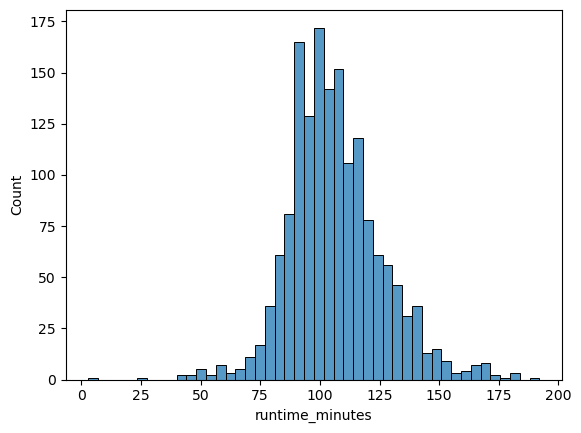

In [72]:
#we see the median of runing minutes is 100
sns.histplot(m['runtime_minutes'])

In [155]:
m.groupby('genres')['popularity'].median().sort_values(ascending=False).head(20)

genres
ActionMysterySci-Fi        36.9550
ComedyMystery              32.2660
AdventureDramaSci-Fi       25.6480
AdventureMysterySci-Fi     24.9800
ActionAdventureComedy      24.3370
ActionAdventureFantasy     22.8560
BiographyDramaMusical      22.0090
ComedyFamilyFantasy        21.5345
AdventureFantasy           21.2750
DramaRomanceThriller       21.2290
ActionAdventureSci-Fi      20.9040
AdventureFamilyFantasy     18.7310
ActionSci-Fi               18.7215
ActionAnimationComedy      18.3100
HorrorSci-FiThriller       18.1165
MysteryThriller            18.0600
ActionAdventureThriller    18.0500
AdventureDramaSport        17.9305
FantasyRomance             17.9305
AdventureDramaFantasy      17.6700
Name: popularity, dtype: float64

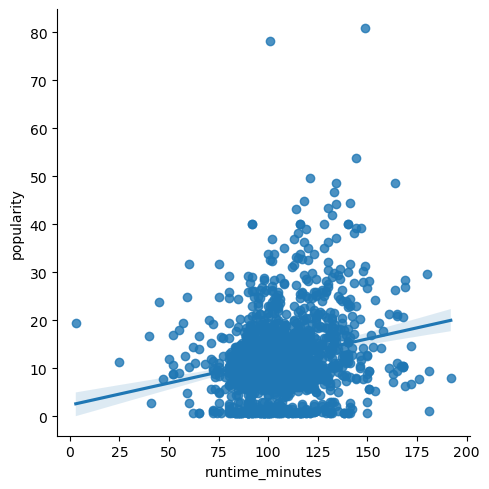

In [73]:
sns.lmplot(x="runtime_minutes", y="popularity", data=m);

### What does time, popularity have to do with rating ?

<Figure size 1400x600 with 0 Axes>

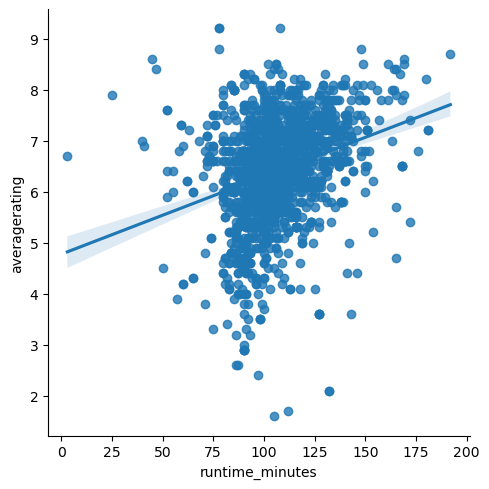

In [74]:
#we see a strong relationship here and where the time at median means there is a neutral rating 
plt.figure(figsize=(14,6))
sns.lmplot(x="runtime_minutes", y="averagerating", data=m)
plt.show()

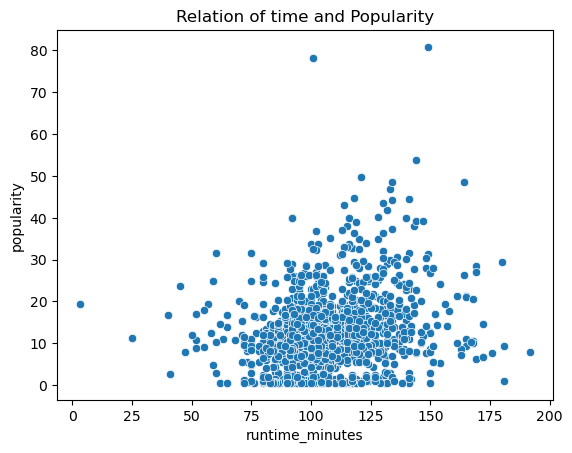

In [154]:
sns.scatterplot(data=m, x='runtime_minutes',y='popularity')
plt.title('Relation of time and Popularity');

## Key factor 2  Correlation between Worldwide and Domestic

<AxesSubplot:xlabel='domestic_gross_y', ylabel='worldwide_gross'>

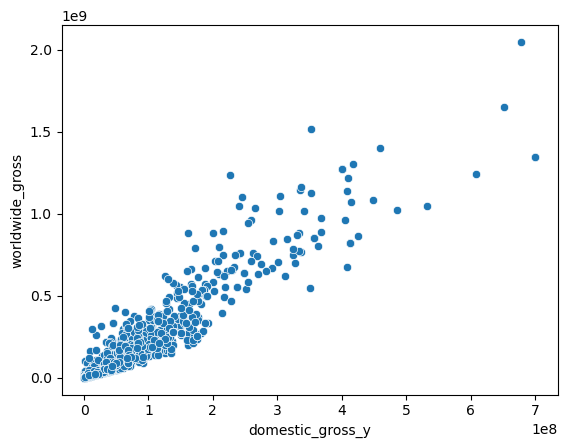

In [75]:
sns.scatterplot(x=m['domestic_gross_y'],y=m['worldwide_gross'])

## Key Factor 3 Language  
* What does language have to do with worldwide gross, domestic gross and Profit ?

In [76]:
o_w = m.groupby('original_language')['worldwide_gross'].mean().sort_values(ascending=False)
o_w = pd.DataFrame (o_w)
o_w.reset_index()

,original_language,worldwide_gross
0,te,2.635029e+08
1,en,1.553426e+08
2,th,1.435207e+08
3,hu,1.023065e+08
4,el,9.962487e+07
5,hi,6.785477e+07
6,ko,4.411706e+07
7,fr,3.970229e+07
8,zh,3.161467e+07
9,he,2.400157e+07


<AxesSubplot:xlabel='original_language', ylabel='worldwide_gross'>

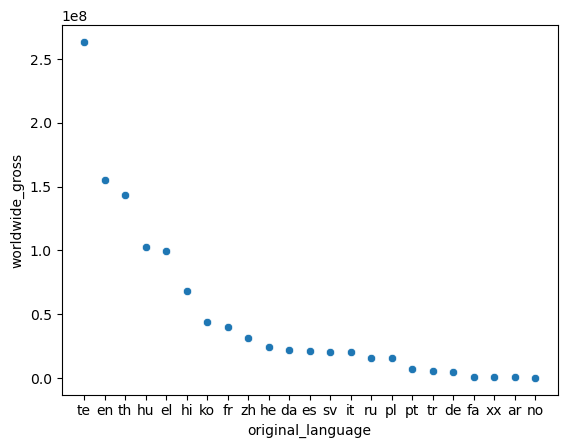

In [77]:
#sns.barplot(x=m["worldwide_gross"], y=m["original_language"])
sns.scatterplot(x='original_language',
            y="worldwide_gross", data=o_w)

In [78]:
m.loc[m['original_language']=='te']

,title,runtime_minutes,genres,averagerating,numvotes,studio,foreign_gross,year,release_date_x,production_budget,domestic_gross_y,worldwide_gross,original_language,popularity,release_date_y,vote_average,vote_count,Profit
tconst,,,,,,,,,,,,,,,,,,
tt4849438,Baahubali 2: The Conclusion,167.0,ActionDrama,8.3,65656,GrtIndia,234000000,2017,Apr 28 2017,30000000,18985794,263502914,te,10.406,2017-04-27,7.0,252,233502914


In [79]:
op = m.groupby('original_language')['Profit'].mean().sort_values(ascending=False)
op = pd.DataFrame (op)
op.reset_index()

,original_language,Profit
0,te,2.335029e+08
1,en,1.086282e+08
2,th,9.852069e+07
3,hu,7.130650e+07
4,hi,5.759762e+07
5,el,4.862487e+07
6,fr,2.349459e+07
7,ko,1.741706e+07
8,sv,1.391284e+07
9,pl,1.269836e+07


<AxesSubplot:xlabel='original_language', ylabel='Profit'>

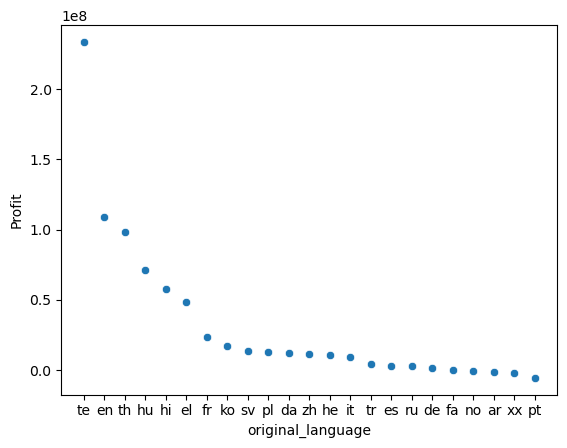

In [80]:
sns.scatterplot(x='original_language',
            y="Profit", data=op)

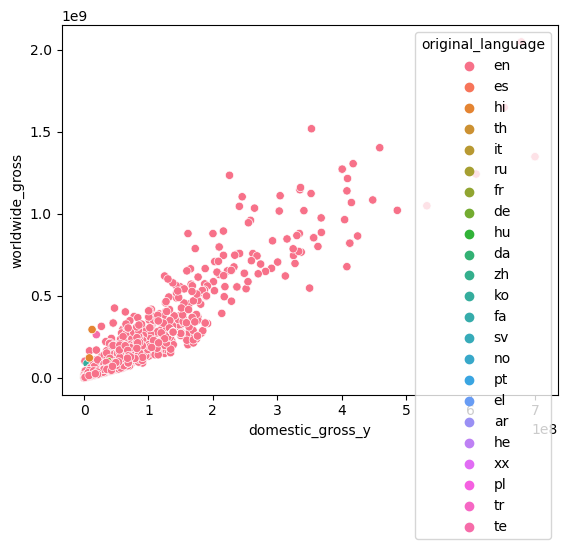

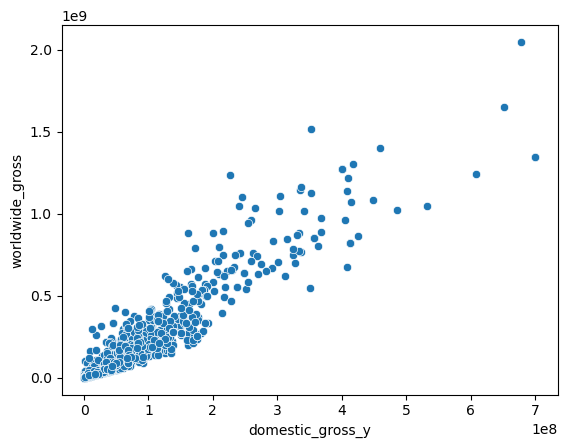

In [83]:
#we see a corelation happen profit is made if production budget is increased 
#langage is also a factor as many genres are made using the language the higher profit merging 
sns.scatterplot(x="domestic_gross_y", y="worldwide_gross", hue=m['original_language'], data=m)
plt.show();
sns.scatterplot(x="domestic_gross_y", y="worldwide_gross", data=m);

### Question 3  Ratings 

#### Group genres, rating, language and profit 

In [84]:
h = m['averagerating']
h= pd.DataFrame(h)
h =h.reset_index()

<AxesSubplot:xlabel='averagerating', ylabel='Count'>

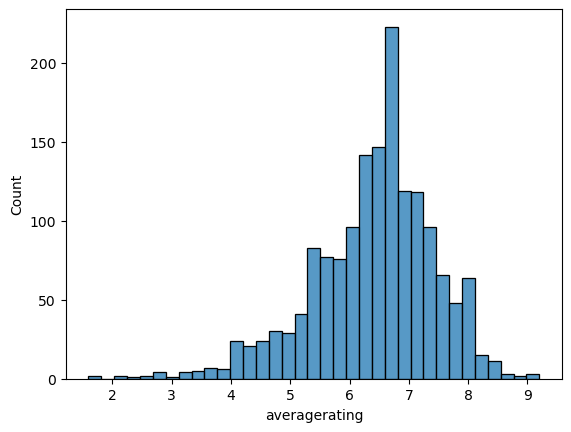

In [85]:
sns.histplot(data=h, x="averagerating")

In [140]:
d = m.groupby(['genres', 'runtime_minutes','original_language'])['averagerating'].median().sort_values(ascending=False).head(30)
d = pd.DataFrame(d)
d = d.reset_index()
d.head(3)

,genres,runtime_minutes,original_language,averagerating
0,Documentary,78.0,de,9.2
1,Adventure,108.0,en,9.2
2,Documentary,78.0,en,9.0


In [142]:
f = m.groupby(['genres', 'runtime_minutes','original_language'])['popularity'].median().sort_values(ascending=False).head(90)
f = pd.DataFrame(f)
f = f.reset_index()
f.head(3)

,genres,runtime_minutes,original_language,popularity
0,ActionAdventureSci-Fi,149.0,en,80.773
1,ActionCrimeThriller,101.0,en,78.123
2,AdventureFantasy,144.0,en,53.783


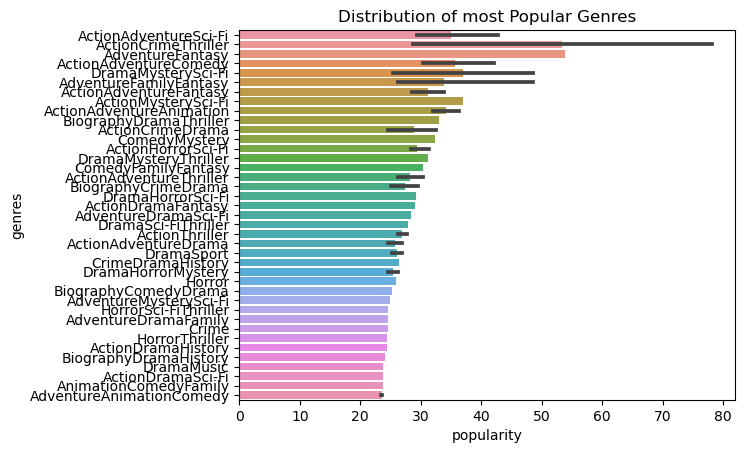

In [145]:
sns.barplot(x=f['popularity'], y=f['genres'])
plt.title('Distribution of most Popular Genres');

<AxesSubplot:xlabel='averagerating', ylabel='genres'>

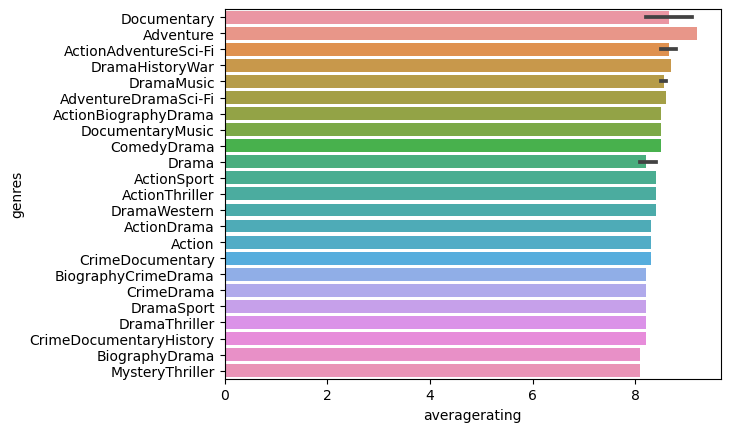

In [87]:
sns.barplot(x=d['averagerating'], y=d['genres'])

<AxesSubplot:xlabel='original_language', ylabel='genres'>

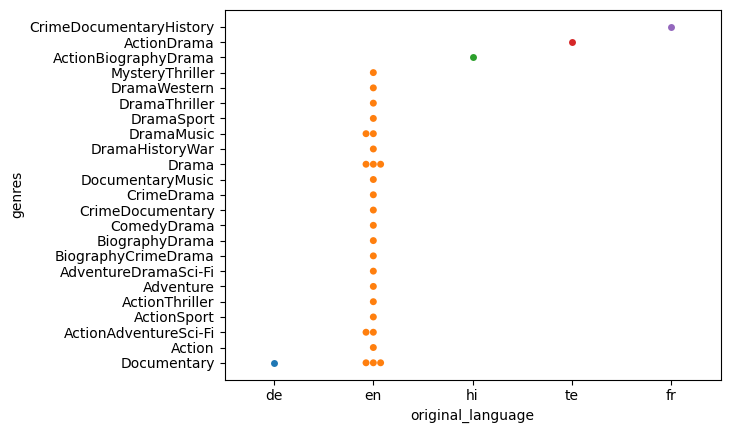

In [88]:
sns.swarmplot(data=d, x="original_language", y="genres")
#sns.countplot(y = 'averagerating', data = h, order = h['genres'].value_counts().head(30).index)
#lets find out what is happening with language 

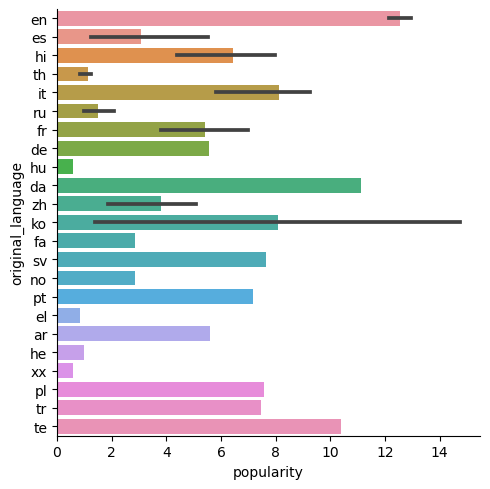

In [89]:
sns.catplot(data=m, x="popularity", y="original_language", kind="bar")
#we see english is still popular with the representation 

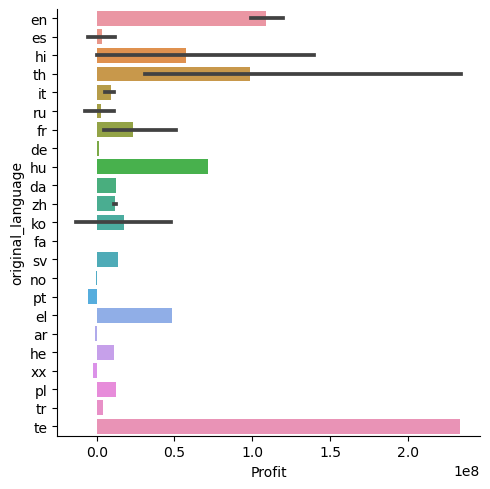

In [90]:
sns.catplot(data=m, x="Profit", y="original_language", kind="bar")

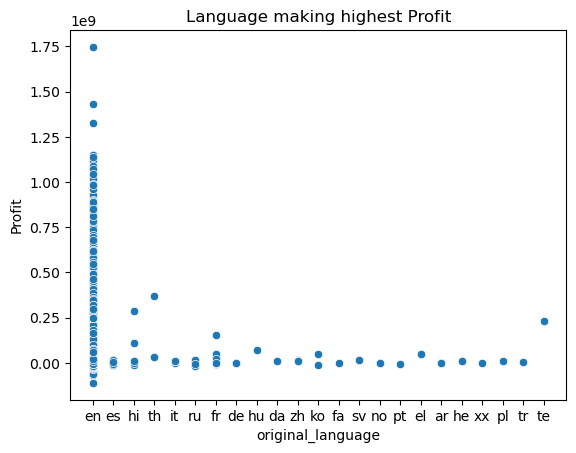

In [118]:
sns.scatterplot(x=m['original_language'], y=m['Profit'])
plt.title('Language making highest Profit');

<AxesSubplot:xlabel='averagerating', ylabel='original_language'>

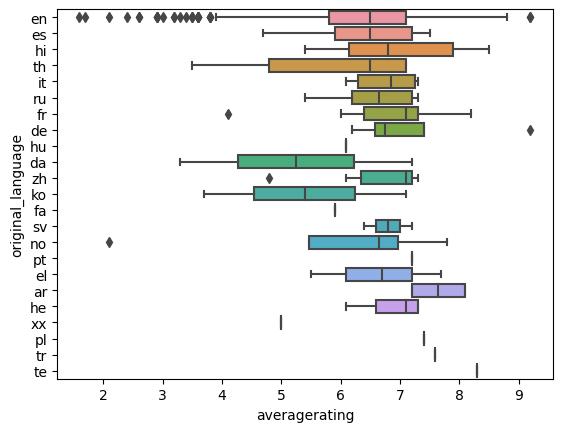

In [91]:
sns.boxplot(data=m, x="averagerating", y="original_language")
#we have outliers dont remove them as they will interfer  with findings
# where there is I this means we only have i raw representing it 
#the higher the number the higher the rating in conclusion english is still top 1

## Key factor 5  release Date

In [92]:
m['month'] = pd.DatetimeIndex(m['release_date_x']).month

In [93]:
m['month'].value_counts().sort_values(ascending=False)

11    171
12    166
1     149
10    144
4     140
6     138
9     135
7     124
8     121
3     112
5     108
2      84
Name: month, dtype: int64

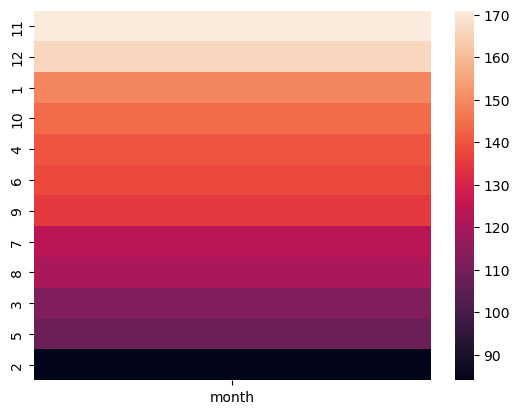

In [94]:
# value_counts creates a Series
vc = m.month.value_counts()
# convert to a DataFrame
vc = vc.to_frame()
# plot
ax = sns.heatmap(data=vc)

<AxesSubplot:xlabel='month', ylabel='Profit'>

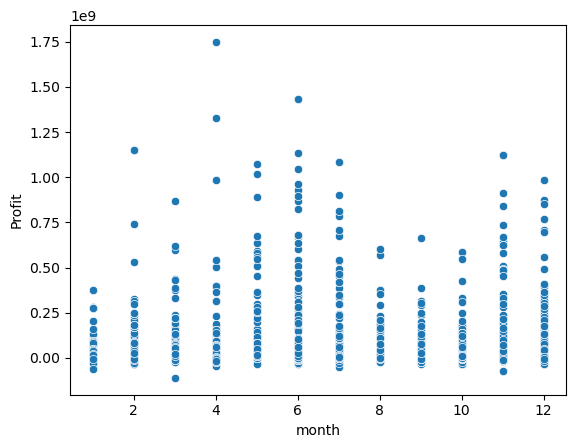

In [95]:
sns.scatterplot(x=m['month'], y=m['Profit'])

In [96]:
m['my_dates'] = pd.to_datetime(m['release_date_x'])

In [97]:
m['day_of_week'] = m['my_dates'].dt.day_name()

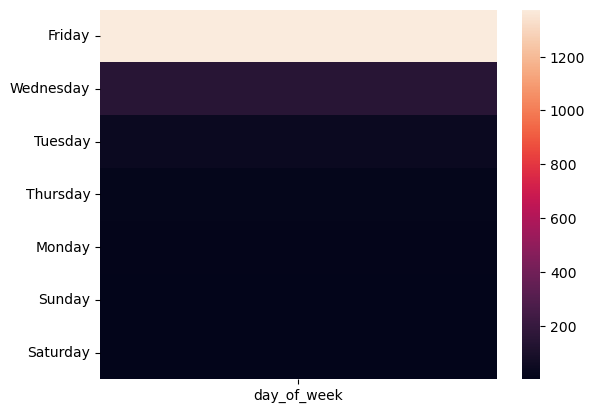

In [108]:
v = m.day_of_week.value_counts()
# convert to a DataFrame
v = v.to_frame()
# plot
ax = sns.heatmap(data=v)

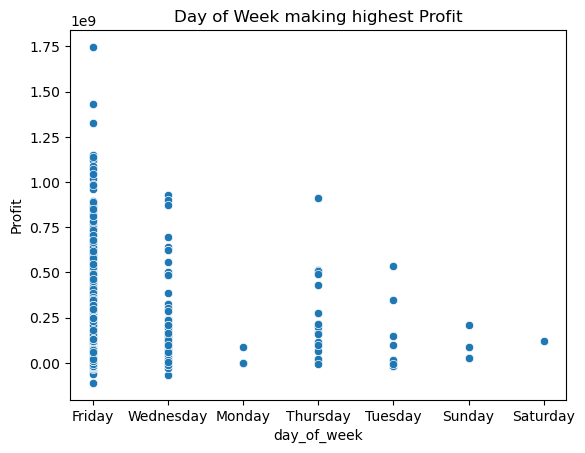

In [116]:
sns.scatterplot(x=m['day_of_week'], y=m['Profit'])
plt.title('Day of Week making highest Profit');

# Limitation

Outliers - had values that were way more than the reset. I choose not to drop because this is real world data and its possible to have such occurences

# Conclusion 

* Drama movies are being produced in bulk in the industry
* the top popular genres have ActionMysterySci-Fi and included Drama 
* FantasyRomance movies are making major profit 
* Focus on both domestic and Worldwide market
* Worldwide make more profits 
* use English language when making movies 
* realeasing a movie in the month of April - August and november - December makes more profit 
* Release on Fridays day week 

# Recommendation

* Invest in Short films  - limit movie length from 95 minutes to 110
* Add a feature for viewers to rate movies to improve product 
* Focus on a worldwide market this is where there is more profit 
* Release movies on holidays: April-August and November -December
* Realease on Fridays day of week 